In [103]:
""" 
Imports
"""
import glob
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm

In [104]:
start_time = datetime(2024, 8, 1, 0, 0)
end_time = datetime(2024, 10, 7, 0, 0)
test_end_time = datetime(2024, 11, 14, 6, 0)
increment = timedelta(hours=1)

data_path = './crypto_data.csv'
df = pd.read_csv(data_path)
df['time'] = pd.to_datetime(df['time'])
df = df.set_index('time')
df = df.loc[start_time : test_end_time]

In [105]:
# Find stocks correlated with TIAPERP
closeDf = df.filter(regex='_close$').sort_index(ascending=True)
logReturnsDf = np.log(closeDf / closeDf.shift(1))
logReturnsDf = logReturnsDf.dropna(how='all', axis=0)
logReturnsDf = logReturnsDf.dropna(how='any', axis=1)
logReturnsDf = logReturnsDf.rename(columns={col: f'{col}_lreturn' for col in logReturnsDf.columns})
logReturnsDf.head()

corrs = logReturnsDf.corrwith(logReturnsDf['TIAPERP_close_lreturn']).sort_values(ascending=False)
corrs

TIAPERP_close_lreturn      1.000000
TIAUSDT_close_lreturn      0.946288
MANTAUSDT_close_lreturn    0.668860
OSMOUSDT_close_lreturn     0.664424
DYMUSDT_close_lreturn      0.656952
                             ...   
GFTUSDT_close_lreturn      0.215103
FTNUSDT_close_lreturn      0.189276
PAXGUSDT_close_lreturn     0.164257
OGUSDT_close_lreturn       0.150962
USDCUSDT_close_lreturn     0.007879
Length: 403, dtype: float64

In [106]:
# Stocks chosen
stocks = ['TIAPERP', 'MNTPERP', 'ONDOPERP', 'ETCPERP', 'ARBPERP']
filteredCols = [col for col in df.columns if any([(stock in col) for stock in stocks])]
chosenDf = df.loc[:,filteredCols]

In [107]:
# Check na and get rid of 0s
chosenDf.isna().sum().sort_values(ascending=False).head(20)
chosenDf.describe().T

# mins = chosenDf[chosenDf != 0].min()
# chosenDf = chosenDf.replace(to_replace=0, value=mins)
# chosenDf.describe().T

,count,mean,std,min,25%,50%,75%,max
TIAPERP_open,2527.0,5.209039,0.641776,3.7470,4.765000,5.19700,5.732000,6.65500
TIAPERP_high,2527.0,5.257379,0.648925,3.8510,4.811000,5.24500,5.781000,6.84800
TIAPERP_low,2527.0,5.160359,0.636735,3.6600,4.710000,5.14200,5.687000,6.57300
TIAPERP_close,2527.0,5.208892,0.641781,3.7470,4.765000,5.19700,5.732000,6.65500
TIAPERP_volume,2527.0,2157.414840,4107.008072,0.0000,340.475000,901.28000,2280.735000,64599.75000
TIAPERP_turnover,2527.0,11450.947372,22037.675044,0.0000,1686.505320,4673.21996,11991.229650,306277.78202
ETCPERP_open,2527.0,19.051023,1.143013,15.9800,18.345000,18.81000,19.455000,24.48500
ETCPERP_high,2527.0,19.123472,1.167984,16.3700,18.397500,18.87000,19.515000,24.62500
ETCPERP_low,2527.0,18.970689,1.116478,15.6300,18.285000,18.74500,19.395000,23.83000
ETCPERP_close,2527.0,19.051167,1.143399,15.9800,18.345000,18.81000,19.455000,24.48500


In [108]:
for dataType in ['close', 'turnover']:
    lags = [1,2,3,4,7]

    # Log Returns
    for stock in stocks:
        for lag in lags:
            chosenDf[f'{stock}_logReturn_{dataType}_{lag}'] = np.log(chosenDf[f'{stock}_{dataType}'] / chosenDf[f'{stock}_{dataType}'].shift(lag))

    # Moving average
    for stock in stocks:
        for lag in lags:
            chosenDf[f'{stock}_movingAverage_{dataType}_{lag}'] = chosenDf[f'{stock}_{dataType}'].rolling(lag).mean()

    # Z Score
    for stock in stocks:
        for lag in lags:
            if lag == 1: continue
            chosenDf[f'{stock}_zscore_{dataType}_{lag}'] = (chosenDf[f'{stock}_{dataType}'] - chosenDf[f'{stock}_movingAverage_{dataType}_{lag}'])/chosenDf[f'{stock}_{dataType}'].rolling(lag).std()
            chosenDf[f'{stock}_zscore_{dataType}_{lag}'] = chosenDf[f'{stock}_zscore_{dataType}_{lag}'].fillna(0)

display(chosenDf.isna().sum().sort_values(ascending=False).head(20))
featuredDf = chosenDf.dropna(how='any', axis=0)
featuredDf = featuredDf.replace([np.inf, -np.inf], 0)
featuredDf.head()

/Users/akhilkammila/miniconda3/envs/tradingClub/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/akhilkammila/miniconda3/envs/tradingClub/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/akhilkammila/miniconda3/envs/tradingClub/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/akhilkammila/miniconda3/envs/tradingClub/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/akhilkammila/miniconda3/envs/tradingClub/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  r

MNTPERP_logReturn_turnover_4         16
MNTPERP_logReturn_turnover_2         16
MNTPERP_logReturn_turnover_7         15
MNTPERP_logReturn_turnover_1         15
MNTPERP_logReturn_turnover_3         12
ONDOPERP_logReturn_turnover_7         7
ETCPERP_logReturn_close_7             7
TIAPERP_logReturn_close_7             7
ETCPERP_logReturn_turnover_7          7
MNTPERP_logReturn_close_7             7
ONDOPERP_logReturn_close_7            7
TIAPERP_logReturn_turnover_7          7
ARBPERP_logReturn_turnover_7          7
ARBPERP_logReturn_close_7             7
ETCPERP_movingAverage_close_7         6
ONDOPERP_movingAverage_close_7        6
ARBPERP_movingAverage_close_7         6
MNTPERP_movingAverage_turnover_7      6
TIAPERP_movingAverage_close_7         6
ONDOPERP_movingAverage_turnover_7     6
dtype: int64

,TIAPERP_open,TIAPERP_high,TIAPERP_low,TIAPERP_close,TIAPERP_volume,TIAPERP_turnover,ETCPERP_open,ETCPERP_high,ETCPERP_low,ETCPERP_close,...,ONDOPERP_zscore_turnover_4,ONDOPERP_zscore_turnover_7,ETCPERP_zscore_turnover_2,ETCPERP_zscore_turnover_3,ETCPERP_zscore_turnover_4,ETCPERP_zscore_turnover_7,ARBPERP_zscore_turnover_2,ARBPERP_zscore_turnover_3,ARBPERP_zscore_turnover_4,ARBPERP_zscore_turnover_7
time,,,,,,,,,,,,,,,,,,,,,
2024-08-01 07:00:00,5.305,5.350,5.287,5.350,1638.92,8686.75076,21.760,21.830,21.725,21.815,...,1.231892,0.203959,-0.707107,0.273447,-0.217334,0.416943,-0.707107,-0.606632,-0.755745,-0.954368
2024-08-01 08:00:00,5.350,5.388,5.332,5.386,266.03,1424.89480,21.815,21.925,21.795,21.870,...,-0.744237,-0.545404,0.707107,0.999937,0.974695,0.832905,0.707107,1.153228,0.386016,-0.469453
2024-08-01 09:00:00,5.386,5.386,5.304,5.329,327.18,1744.59138,21.870,21.870,21.730,21.755,...,-1.222068,-1.430058,-0.707107,-1.059170,-1.388193,-0.831613,0.707107,1.146669,1.488764,1.487354
2024-08-01 10:00:00,5.329,5.329,5.200,5.200,653.62,3427.67035,21.755,21.755,21.370,21.370,...,1.469441,2.217624,0.707107,-0.403663,-0.596485,-0.789036,0.707107,1.133478,1.465509,2.215305
2024-08-01 11:00:00,5.200,5.312,5.141,5.255,1662.44,8653.59540,21.370,21.370,21.170,21.310,...,1.250274,1.936776,0.707107,1.151511,1.343119,1.958401,0.707107,1.146034,1.483703,2.238517


In [109]:
# Prediction with LR
Y = featuredDf['TIAPERP_logReturn_close_1'].shift(-1).dropna()
X = featuredDf.drop(labels=featuredDf.index[-1], axis=0)

x_train = X.loc[start_time:end_time]
y_train = Y.loc[start_time:end_time]
x_test = X.loc[end_time+timedelta(hours=1):test_end_time]
y_test = Y.loc[end_time+timedelta(hours=1):test_end_time]


import statsmodels.api as sm

model = sm.OLS(y_train, x_train).fit()
print(model.summary())

                                    OLS Regression Results                                    
Dep. Variable:     TIAPERP_logReturn_close_1   R-squared (uncentered):                   0.147
Model:                                   OLS   Adj. R-squared (uncentered):              0.054
Method:                        Least Squares   F-statistic:                              1.579
Date:                       Mon, 18 Nov 2024   Prob (F-statistic):                    2.19e-05
Time:                               20:15:07   Log-Likelihood:                          4652.6
No. Observations:                       1573   AIC:                                     -8995.
Df Residuals:                           1418   BIC:                                     -8164.
Df Model:                                155                                                  
Covariance Type:                   nonrobust                                                  
                                        coef    st

In [123]:
# % Guess correct direction

predictions = model.predict(x_test)
# sns.scatterplot(predictions, Y)

upPredict = (predictions > 0).sum()
downPredict = (predictions < 0).sum()

upCorrect = ((predictions > 0) & (y_test > 0)).sum()
downCorrect = ((predictions < 0) & (y_test < 0)).sum()

upCorrect/upPredict, downCorrect/downPredict

(0.5108225108225108, 0.5240274599542334)

/Users/akhilkammila/miniconda3/envs/tradingClub/lib/python3.12/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='time'>

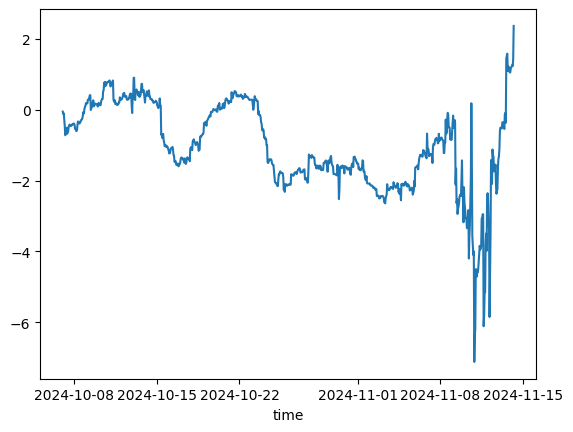

In [126]:
# Pnl graph
price = featuredDf.loc[end_time:test_end_time]['TIAPERP_close']
price.shape
pnl = (price.shift(-1)-price)*predictions/np.std(predictions) * 20/price
sns.lineplot(price.index, np.cumsum(pnl))

/Users/akhilkammila/miniconda3/envs/tradingClub/lib/python3.12/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: ylabel='TIAPERP_logReturn_close_1'>

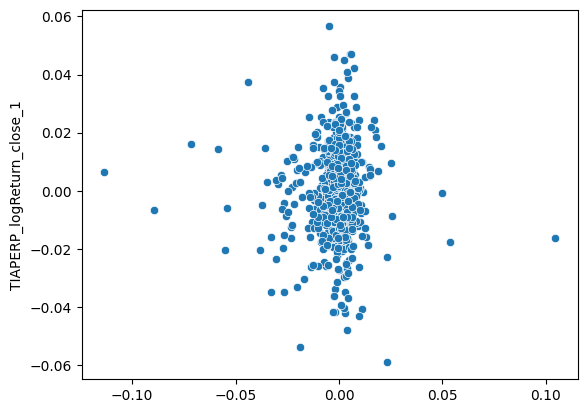

In [125]:
sns.scatterplot(predictions, y_test)